In [21]:
# 📦 Step 1: Import Libraries
import json
import matplotlib.pyplot as plt
import os
import pandas as pd


In [ ]:

# 📂 Step 2: Load JSON Data
# Make sure the file 'results.json' is in the same directory as this notebook
file_path = 'rl_vs_autotuner_comparison_results_vram.json'

with open(file_path, 'r') as f:
    data = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'rl_vs_autotuner_comparison_results_vram'

In [ ]:
# ✅ Step 3: Extract Differences (Use numeric IDs for labels)
tflops_diff = []
vram_diff = []
runtime_diff = []
size_map = []  # Mapping from ID to actual [M, N, K]

for idx, entry in enumerate(data["results"]):
    rl = entry["rl_agent"]
    at = entry["autotuner"]

    tflops_diff.append(rl["tflops"] - at["tflops"])
    vram_diff.append(rl["vram_mb"] - at["vram_mb"])
    runtime_diff.append(rl["runtime_ms"] - at["runtime_ms"])
    size_map.append(str(entry["size"]))  # for reference later

# ✅ x_labels should be exactly the same length
x_labels = list(range(len(tflops_diff)))



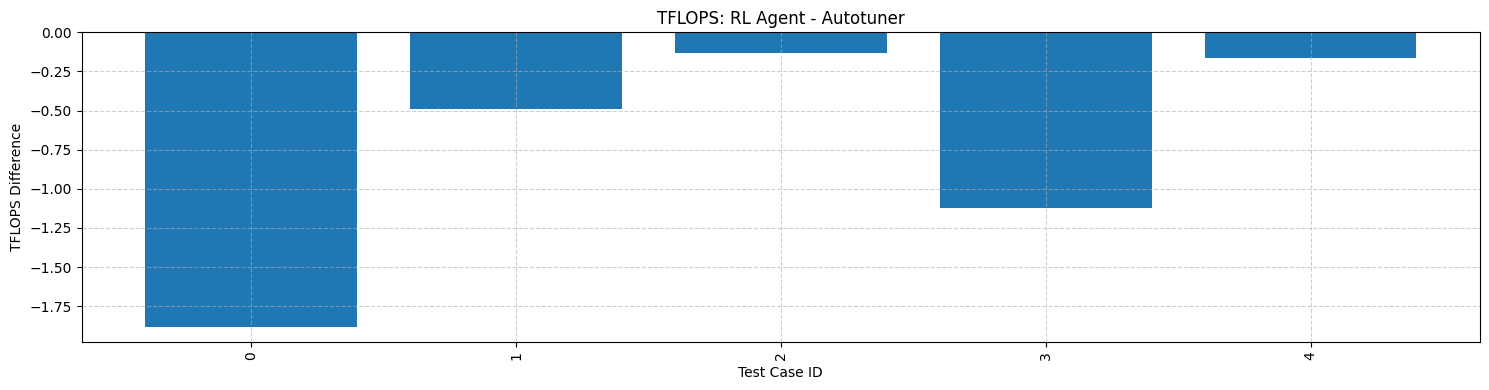

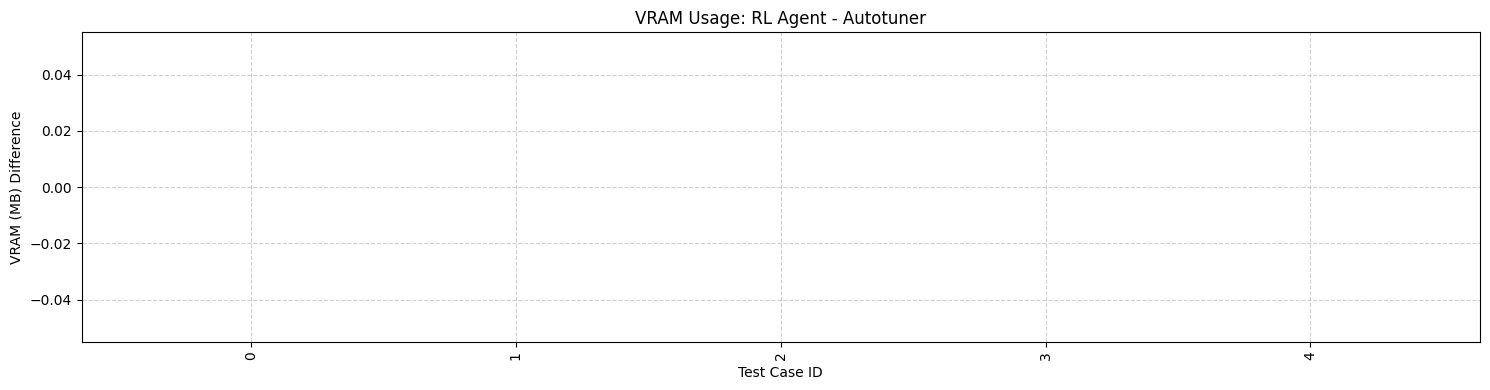

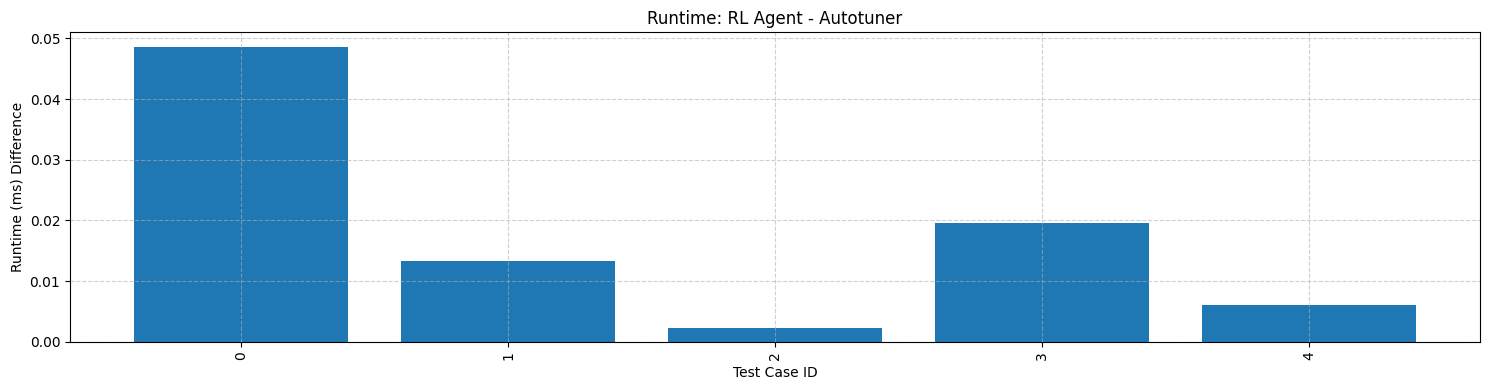

In [ ]:

# Step 4: Define Plotting Function
def plot_metric(diffs, ylabel, title):
    x = list(range(len(diffs)))  # x must match len(diffs)
    plt.figure(figsize=(15, 4))
    plt.bar(x, diffs)
    plt.xticks(x, x, rotation=90)
    plt.xlabel("Test Case ID")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



# Step 5: Plot TFLOPS Difference
plot_metric(tflops_diff, "TFLOPS Difference", "TFLOPS: RL Agent - Autotuner")

# Step 6: Plot VRAM Difference
plot_metric(vram_diff, "VRAM (MB) Difference", "VRAM Usage: RL Agent - Autotuner")

#  Step 7: Plot Runtime Difference
plot_metric(runtime_diff, "Runtime (ms) Difference", "Runtime: RL Agent - Autotuner")

In [ ]:
table_data = []
for entry in data['results']:
    rl_agent_data = entry.get('rl_agent', {})
    autotuner_data = entry.get('autotuner', {})
    
    table_data.append({
        "Problem Size": str(entry.get('size')),
        "RL TFLOPS": rl_agent_data.get('tflops'),
        "Autotuner TFLOPS": autotuner_data.get('tflops'),
        "RL VRAM (MB)": rl_agent_data.get('vram_mb'),
        "Autotuner VRAM (MB)": autotuner_data.get('vram_mb'),
        "RL Best Config": str(rl_agent_data.get('best_config')),
        "Autotuner Best Config": str(autotuner_data.get('best_config'))
    })

# Create a pandas DataFrame
df = pd.DataFrame(table_data)

# Set display options to show all content without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display the table
print("\n--- Side-by-Side Comparison ---")
display(df)


--- Side-by-Side Comparison ---


,Problem Size,RL TFLOPS,Autotuner TFLOPS,RL VRAM (MB),Autotuner VRAM (MB),RL Best Config,Autotuner Best Config
0,"[14, 24, 256, 16, 16, 5, 5, [1, 1], [3, 3]]",6.078933,7.962407,269.655273,269.655273,"{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 32, 'BLOCK_SIZE_CIN': 16, 'BLOCK_SIZE_COUT': 32, 'num_warps': 4, 'num_stages': 4}","{'BLOCK_SIZE_H': 16, 'BLOCK_SIZE_W': 8, 'BLOCK_SIZE_CIN': 16, 'BLOCK_SIZE_COUT': 16, 'num_warps': 8, 'num_stages': 1}"
1,"[12, 24, 224, 192, 16, 1, 1, [2, 2], [1, 1]]",1.701863,2.192655,292.667480,292.667480,"{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 32, 'BLOCK_SIZE_CIN': 16, 'BLOCK_SIZE_COUT': 32, 'num_warps': 4, 'num_stages': 4}","{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 16, 'BLOCK_SIZE_CIN': 16, 'BLOCK_SIZE_COUT': 16, 'num_warps': 4, 'num_stages': 4}"
2,"[1, 32, 48, 176, 32, 1, 1, [2, 2], [1, 1]]",0.447738,0.577843,292.667480,292.667480,"{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 4, 'BLOCK_SIZE_CIN': 64, 'BLOCK_SIZE_COUT': 16, 'num_warps': 4, 'num_stages': 4}","{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 16, 'BLOCK_SIZE_CIN': 64, 'BLOCK_SIZE_COUT': 32, 'num_warps': 4, 'num_stages': 1}"
3,"[14, 32, 48, 96, 32, 1, 1, [2, 2], [1, 1]]",0.962347,2.084506,292.667480,292.667480,"{'BLOCK_SIZE_H': 16, 'BLOCK_SIZE_W': 4, 'BLOCK_SIZE_CIN': 64, 'BLOCK_SIZE_COUT': 16, 'num_warps': 4, 'num_stages': 4}","{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 16, 'BLOCK_SIZE_CIN': 32, 'BLOCK_SIZE_COUT': 32, 'num_warps': 4, 'num_stages': 1}"
4,"[13, 24, 144, 192, 8, 1, 1, [2, 2], [1, 1]]",0.887493,1.049655,292.667480,292.667480,"{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 32, 'BLOCK_SIZE_CIN': 16, 'BLOCK_SIZE_COUT': 32, 'num_warps': 4, 'num_stages': 4}","{'BLOCK_SIZE_H': 4, 'BLOCK_SIZE_W': 16, 'BLOCK_SIZE_CIN': 16, 'BLOCK_SIZE_COUT': 16, 'num_warps': 4, 'num_stages': 3}"
